<a href="https://colab.research.google.com/github/okaybuyukdeveci/LLM_projects/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Doğru encoding ile dosyayı okuma
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/colab project/twitter_data.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

In [3]:
data.head(5)

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
data.tail(5)

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
data.columns

Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

In [6]:
# lenght of data
print('lenght of data is ', len(data))

lenght of data is  1599999


In [7]:
# Shape of data
data.shape

(1599999, 6)

In [8]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
# Data types of all columns
data.dtypes

,0
label,int64
time,int64
date,object
query,object
username,object
text,object


In [10]:
# Checking NULL values
data.isnull().sum()

,0
label,0
time,0
date,0
query,0
username,0
text,0


In [11]:
# Checking all data
np.sum(data.isnull().any(axis=1))

0

# Data Preparation

Selection of interested coloumns

Assinged 1 to class 4

Took one fourth data so we can run on our machine easily

Combined positive and negative tweets

We will convert the text in lower case for the further working on tweet text.

We will clean and remove the stop words(of, a, in etc) from statement because these words are not useuseful to support the labels of sentiments data

We will clean and remove the punctuations because these are the noise in the data and not meaningfull

We will clean and remove repeating characters in the words

We will clean and remove emails

We will clean and remove URL's

We will clean and remove the numbers in the data

We will apply tokenization(to separate the sentence into words)

We will apply stemming and lemmatization on the text. The concept of both is following:

We will apply stemming on the tweet text.

We will apply lemmatization on the tweet text.

Separated input feature and labels

Extracted features from input feature

Separated the 70% data for training and 30% data for testing




In [12]:
# Selecting the text and label column

data = data[['text','label']]

In [13]:
# Assigning 1 to positive sentiment 4
data.loc[data['label']==4,'label']=1

In [14]:
# Checking data labels
data['label'].value_counts()

,count
label,
1,800000
0,799999


In [15]:
# Seperating positive and negative tweets

data_positive = data[data['label']==1]
data_negative = data[data['label']==0]

In [16]:
len(data_positive)+len(data_negative)

1599999

In [17]:
# Taking one fourth data so we can run on our machine easily

data_positive = data_positive.iloc[:int(20000)]
data_negative = data_negative.iloc[:int(20000)]

In [18]:
# Combining positive and negative tweets
data = pd.concat([data_positive,data_negative])

In [19]:
# Making statement text in lower case

data['text'] = data['text'].str.lower()

In [20]:
# Checking the texts
for i in range(5):
  print(data['text'].iloc[i])

i love @health4uandpets u guys r the best!! 
im meeting up with one of my besties tonight! cant wait!!  - girl talk!!
@darealsunisakim thanks for the twitter add, sunisa! i got to meet you once at a hin show here in the dc area and you were a sweetheart. 
being sick can be really cheap when it hurts too much to eat real food  plus, your friends make you soup
@lovesbrooklyn2 he has that effect on everyone 


In [21]:
# Cleaning and removing Stop words of english
nltk.download('stopwords')

stopwords_list =stopwords.words('english')
stopwords_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [23]:
# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

,text
799999,love @health4uandpets u guys r best!!
800000,im meeting one besties tonight! cant wait!! - ...
800001,"@darealsunisakim thanks twitter add, sunisa! g..."
800002,sick really cheap hurts much eat real food plu...
800003,@lovesbrooklyn2 effect everyone


In [24]:
# Cleaning and removing punctuations

english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
  translator = str.maketrans('','',punctuations_list)

  return text.translate(translator)

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
# after this cell punctuations will be gone
data['text'] = data['text'].apply(lambda x: cleaning_punctuations(x))

In [27]:
data['text'][100]

'mangaaa hope increase capacity fast yesterday pain got fail whale 15 times 2 hours'

In [28]:
# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
  return re.sub(r'(.)1+',r'1',text)

In [29]:
data['text'] = data['text'].apply(lambda x:cleaning_repeating_char(x))
data['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent get thingee made sad face
19999,heather21 good thing find none ones like come ...


In [30]:
# Cleaning and removing email

def cleaning_email(data):
  return re.sub('@[^/s]+',' ',data)

In [31]:
data['text'] = data['text'].apply(lambda x:cleaning_email(x))
data['text'].head()

,text
799999,love health4uandpets u guys r best
800000,im meeting one besties tonight cant wait girl...
800001,darealsunisakim thanks twitter add sunisa got ...
800002,sick really cheap hurts much eat real food plu...
800003,lovesbrooklyn2 effect everyone


In [32]:
# Cleaning and removing URL's

def cleaning_URLs(data):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [33]:
data['text'] = data['text'].apply(lambda x:cleaning_URLs(x))

In [34]:
# Cleaning and removing Numeric Numbers

def cleaning_numbers(data):
  return re.sub('[0-9]+', '',data)

In [35]:
data['text']=data['text'].apply(lambda x:cleaning_numbers(x))
data['text'].tail()

,text
19995,one day holidays
19996,feeling right hate damn humprey
19997,geezi hv read whole book personality types emb...
19998,threw sign donnie bent get thingee made sad face
19999,heather good thing find none ones like come si...


In [36]:
# Getting tokenization of tweet text

tokenizer = RegexpTokenizer(r'\w+')
data['text']=data['text'].apply(tokenizer.tokenize)
data['text'].head()

,text
799999,"[love, healthuandpets, u, guys, r, best]"
800000,"[im, meeting, one, besties, tonight, cant, wai..."
800001,"[darealsunisakim, thanks, twitter, add, sunisa..."
800002,"[sick, really, cheap, hurts, much, eat, real, ..."
800003,"[lovesbrooklyn, effect, everyone]"


In [37]:
# Applying Stemming

st = nltk.PorterStemmer()

def stemming_on_text(data):
  text=[st.stem(word) for word in data]
  return text

data['text'] = data['text'].apply(lambda x:stemming_on_text(x))
data['text'].head()

,text
799999,"[love, healthuandpet, u, guy, r, best]"
800000,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,"[darealsunisakim, thank, twitter, add, sunisa,..."
800002,"[sick, realli, cheap, hurt, much, eat, real, f..."
800003,"[lovesbrooklyn, effect, everyon]"


In [38]:
# Applying Lemmatizer
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return text

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

data['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text
799999,"[love, healthuandpet, u, guy, r, best]"
800000,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,"[darealsunisakim, thank, twitter, add, sunisa,..."
800002,"[sick, realli, cheap, hurt, much, eat, real, f..."
800003,"[lovesbrooklyn, effect, everyon]"


# Labels
Labels are the targets like in this project sentiments of the tweets are labels.
# Inputs
Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.
#Training Data
We use validation data while training the model. We use this data to evaluate the perfonmance that how the model perform on training time.
# Testing Data
We use testing data after training the model.We use this data to evaluate the performance that how the model perform after training.So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..



In [39]:
# Seperating input feature and label

X = data.text
y =data.label

In [40]:
X.head(), y.head()

(799999               [love, healthuandpet, u, guy, r, best]
 800000    [im, meet, one, besti, tonight, cant, wait, gi...
 800001    [darealsunisakim, thank, twitter, add, sunisa,...
 800002    [sick, realli, cheap, hurt, much, eat, real, f...
 800003                     [lovesbrooklyn, effect, everyon]
 Name: text, dtype: object,
 799999    1
 800000    1
 800001    1
 800002    1
 800003    1
 Name: label, dtype: int64)

### Preparing the input features fro training

* We converting the text words into arrays form.
* Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distiguish between then positive tweets and negative tweets.

In [41]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [42]:
sequences_matrix.shape

(40000, 500)

As we can see that there total 40000 tweets and the number words/features are 500.

## Seperating the %70 data for training and %30 for testing data

As we prepared all the tweets, now we are seperating/ splitting the tweets into training data and testing data.

* 70% tweets will be used in the training.
* 30% tweets will be used to test the performance of the model

In [43]:
X_train,X_test,y_train,y_test = train_test_split(sequences_matrix,y,test_size=0.3, random_state= 42)


# Implementing Tensorflow based model for training

## Step 1
* The input to model is 500 words because these are the number features/words that we extracted above from text of tweets.
## Step 2
* Embeddings provide the presentation of words and their relative meanings. Like in this, we are feeding the limit of maximum words, lenght of input words and the inputs of previous layer.
## Step 3
* LSTM (long short term memory) save the words and predict the next words based on the previous words. LSTM is a sequance predictor of next coming words.
##Step 4
* Dense layer reduce the outputs by getting inputs from Faltten layer. Dense layer use all the inputs of previous layer neurons and perform calculations and send 256 outputs
##Step 5
* Activation function is node that is put at the end of all layers of neural network model or in between neural network layers. Activation function help to decide which neuron should be pass and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs.
## Step 6
* Droupout layer drop some neurons from previous layers. why we apply this? We apply this to avoid the overfitting problems. In overfitting, model give good accuracy on training time but not good on testing time.

In [44]:
def tensorflow_based_model():
  inputs = Input(name='inputs', shape=[max_len])
  layer= Embedding(2000,50,input_length=max_len)(inputs)
  layer=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5)(layer)
  layer=Dense(1,name='out_layer')(layer)

  model = Model(inputs=inputs, outputs=layer)

  return model


## Model Compilation
* First we are calling the model
* We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
* Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
* We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [45]:
model = tensorflow_based_model()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])


## Training and validating with parameter tuning¶

* We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
* Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
* Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
* We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [46]:
history = model.fit(X_train,y_train,batch_size=80,epochs=6,validation_split=0.1)

print("Training Finished")

Epoch 1/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5901 - loss: 0.8353 - val_accuracy: 0.7246 - val_loss: 0.5695
Epoch 2/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7381 - loss: 0.5818 - val_accuracy: 0.7332 - val_loss: 0.5564
Epoch 3/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7523 - loss: 0.5478 - val_accuracy: 0.7325 - val_loss: 0.5836
Epoch 4/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7619 - loss: 0.5459 - val_accuracy: 0.7111 - val_loss: 0.6037
Epoch 5/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7647 - loss: 0.5382 - val_accuracy: 0.7379 - val_loss: 0.5555
Epoch 6/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7752 - loss: 0.5418 - val_accuracy: 0.7271 - val_loss: 0.6946
Training Finished


## Testing the Trained model on test data¶
* Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [47]:
accr1 = model.evaluate(X_test,y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7330 - loss: 0.6538


## Accuracy

* Accuracy is the number of correctly classify tweets from all the tweets of positive and negative.

* For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%.
* Accuracy= Total number of correct predictions/Total number of predictions

In [48]:
print('test set\n Accuracy: {:0.2f}'.format(accr1[0]))

test set
 Accuracy: 0.67


In [49]:
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [50]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [51]:
aa= calculate_results(y_test,y_pred)
aa

{'accuracy': 73.10833333333333,
 'precision': 0.7318221722151008,
 'recall': 0.7310833333333333,
 'f1': 0.730874863280527}

## Confusion matrix

* These are the evaluation measures to evaluate the performance of the model.
* Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.
* 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
* 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.



confusion matrix


[[4221 1782]
 [1445 4552]]




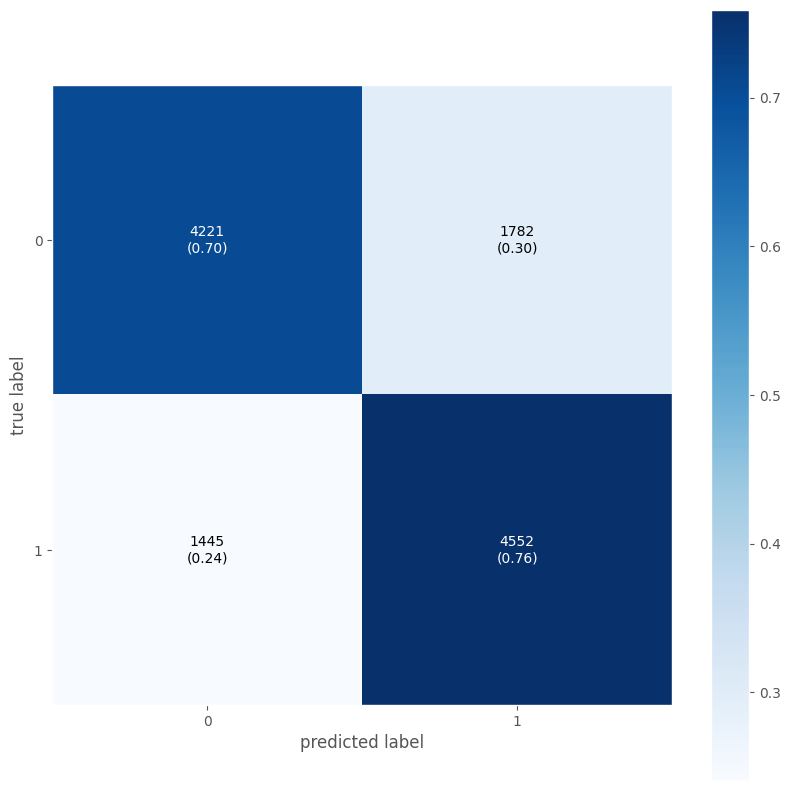

In [52]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## ROC CURVE

* ROC curve show the performance of the model as well.
* We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
* ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

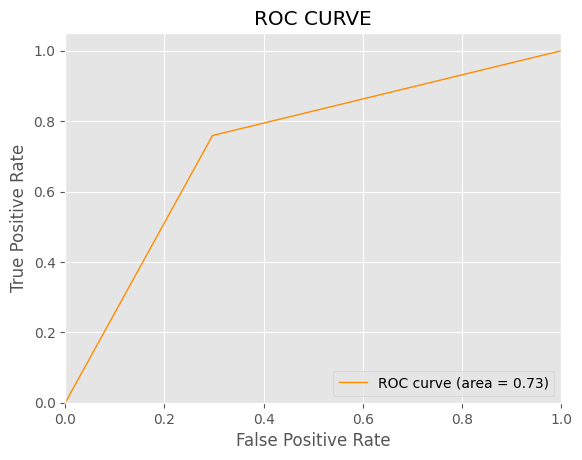

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Bidirectional

def tensorflow_based_model_2():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(2000, 50, input_length=max_len)(inputs)
    layer = Bidirectional(LSTM(128, return_sequences=True))(layer)
    layer = LSTM(64)(layer)
    layer = Dense(128, activation='relu')(layer)
    layer = Dropout(0.3)(layer)
    layer = Dense(1, activation='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

model_2 = tensorflow_based_model_2()

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5, min_lr=1e-6)

history_2 = model_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1,
    callbacks=[early_stopping, lr_reduction]
)

accr2 = model_2.evaluate(X_test, y_test)


Epoch 1/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.6394 - loss: 0.6196 - val_accuracy: 0.7318 - val_loss: 0.5416 - learning_rate: 0.0010
Epoch 2/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.7581 - loss: 0.5032 - val_accuracy: 0.7346 - val_loss: 0.5321 - learning_rate: 0.0010
Epoch 3/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.7786 - loss: 0.4671 - val_accuracy: 0.7382 - val_loss: 0.5368 - learning_rate: 0.0010
Epoch 4/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.7925 - loss: 0.4457 - val_accuracy: 0.7304 - val_loss: 0.5482 - learning_rate: 0.0010
Epoch 5/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7799 - loss: 0.4587 - val_accuracy: 0.7254 - val_loss: 0.5761 - learning_rate: 5.0000e-04
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.7387 - loss: 0.5543


In [55]:
y_pred_2 = model_2.predict(X_test)
y_pred_2 = (y_pred>0.5)
y_pred_2

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [62]:
import random

# Test veri setinden rastgele bir örnek seçip tahmin yapacak fonksiyon
def predict_random_sample(model, X_test, y_test, tokenizer, max_len):
    # Rastgele bir örnek seç
    random_index = random.randint(0, len(X_test) - 1)

    # Test verisinden örneği seç
    sample_sequence = X_test[random_index]
    true_label = y_test[random_index]

    # Geçersiz indeksleri temizle ve tokenizer sözlüğüne uydur
    cleaned_sequence = [idx if idx < 2000 else 0 for idx in sample_sequence]  # 2000'in üstündeki indeksleri sıfırla
    decoded_sample = " ".join([tokenizer.index_word.get(idx, "[UNK]") for idx in cleaned_sequence if idx != 0])

    # Model ile tahmin yap
    sample_sequence = sequence.pad_sequences([cleaned_sequence], maxlen=max_len)  # Input dizisini modele uyumlu hale getir
    prediction = model.predict(sample_sequence)
    predicted_label = "Positive" if prediction > 0.5 else "Negative"

    # Sonuçları yazdır
    print(f"Random Tweet: {decoded_sample}")
    print(f"True Label: {'Positive' if true_label == 1 else 'Negative'}")
    print(f"Predicted Label: {predicted_label}")
    print(f"Prediction Confidence: {prediction[0][0]:.2f}")

# Bu fonksiyonu çağır
predict_random_sample(model_2, X_test, y_test, tok, max_len)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Random Tweet: get good review tweetdeck sadli mac
True Label: Negative
Predicted Label: Negative
Prediction Confidence: 0.04


In [58]:
def compare_historys(original_history, new_history, initial_epochs=5):

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

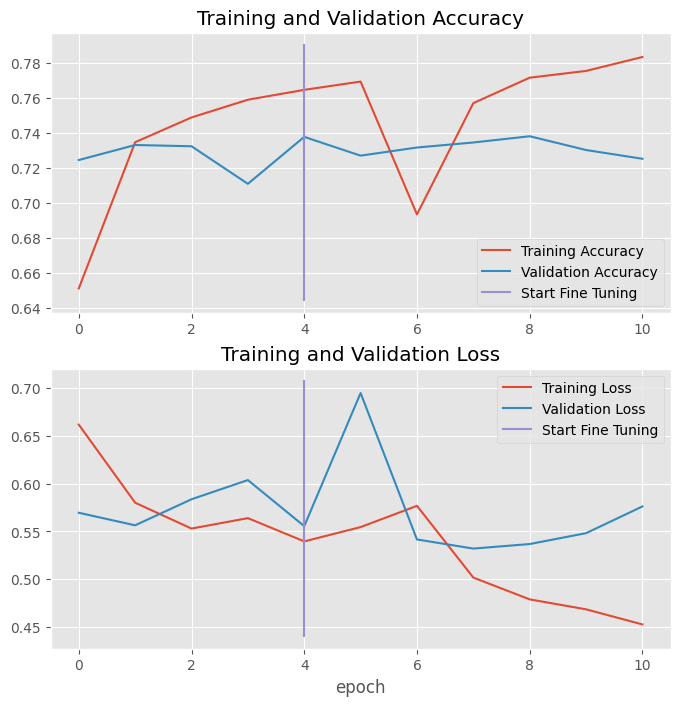

In [59]:
compare_historys(history, history_2)